# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [374]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [375]:
def create_sentiment_df(news_data):
    # Create the Facebook Libra sentiment scores DataFrame
    sentiments = []

    for article in news_data["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
                
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df



In [376]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [377]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q='bitcoin', 
    language='en', 
    sort_by='relevancy'
)

# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q='ethereum', 
    language='en', 
    sort_by='relevancy'
)

In [378]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_sentiment_df(btc_news)
btc_df.head(3)

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912


In [379]:
# Create the Ethereum sentiment scores DataFrame
eth_df = create_sentiment_df(eth_news)
eth_df.head(3)

,date,text,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865


In [380]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.082600,0.078800,0.058850,0.862350
std,0.368099,0.063205,0.060548,0.092202
min,-0.440400,0.000000,0.000000,0.557000
25%,-0.273200,0.040500,0.000000,0.831500
50%,0.089950,0.077000,0.063000,0.879500
75%,0.355075,0.085750,0.072500,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [381]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.067905,0.053050,0.066950,0.879950
std,0.476251,0.064728,0.073236,0.076775
min,-0.784500,0.000000,0.000000,0.681000
25%,-0.317450,0.000000,0.000000,0.827250
50%,-0.249750,0.023000,0.063000,0.899500
75%,0.303775,0.085000,0.077750,0.937000
max,0.735100,0.188000,0.233000,1.000000


### Questions:

Q. Which coin had the highest mean positive score?

A: Ethereum at `0.086860`

Q. Which coin had the highest compound score?

A: Ethereum at `0.952000`

Q. Which coin had the highest positive score?

A: Ethereum at `0.378000`

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [382]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [383]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union({
    'char', 
    'ha',
    'chars',
    'cryptocurrencies',
    'cryptocurrency',
    'crypto',
})

In [417]:
# Complete the tokenizer function
def tokenize(text):
    """Tokenizes text."""

    if type(text) == list:
        text = ' '.join(text)
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase and remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [385]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = 
btc_df.head(3)

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,0
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,0
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,0


In [386]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = 0
eth_df.head(3)

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,0
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,0
2,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,0


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [387]:
from collections import Counter
from nltk import ngrams

In [388]:
def get_words(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenize(corpus_string)
    words = Counter(processed)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

In [389]:
def get_bigrams(corpus):
    big_string = ' '.join(corpus)
    processed = tokenize(big_string)
    bigrams = ngrams(processed, n=2)
    bigrams_list = Counter(bigrams)
    return bigrams_list

In [390]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [391]:
# Generate the Bitcoin N-grams where N=2
btc_corpus = [article['description']+' '+article['content'] for article in btc_news['articles']]
btc_bigrams = get_bigrams(btc_corpus)
token_count(btc_bigrams)

,bigram,count
0,"(bitcoin, dropped)",4
1,"(reuters, bitcoin)",4
2,"(credit, card)",4
3,"(wikipedia, editor)",3
4,"(interest, rate)",3
5,"(previous, close)",3
6,"(previous, closebitcoin)",3
7,"(closebitcoin, world)",3
8,"(world, biggest)",3
9,"(biggest, bestknown)",3


In [392]:
# Generate the Ethereum N-grams where N=2
eth_corpus = [article['description']+' '+article['content'] for article in eth_news['articles']]
eth_bigrams = get_bigrams(eth_corpus)
token_count(eth_bigrams)

,bigram,count
0,"(bitcoin, dropped)",4
1,"(bitcoin, ethereum)",3
2,"(yacht, club)",3
3,"(previous, close)",3
4,"(reuters, bitcoin)",3
5,"(previous, closebitcoin)",3
6,"(closebitcoin, world)",3
7,"(world, biggest)",3
8,"(biggest, bestknown)",3
9,"(us, department)",2


In [393]:
# Use token_count to get the top 10 words for Bitcoin
btc_words = get_words(btc_corpus)
token_count(btc_words)

,bigram,count
0,woman,1
1,inappropriate,1
2,conduct,1
3,conferencegoers,1
4,continued,1
5,haunt,1
6,online,1
7,even,1
8,though,1
9,number,1


In [394]:
# Use token_count to get the top 10 words for Ethereum
eth_words = get_words(eth_corpus)
token_count(eth_words)

,bigram,count
0,us,1
1,department,1
2,treasury,1
3,attributed,1
4,axie,1
5,infinity,1
6,theft,1
7,lazarus,1
8,north,1
9,korean,1


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [395]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

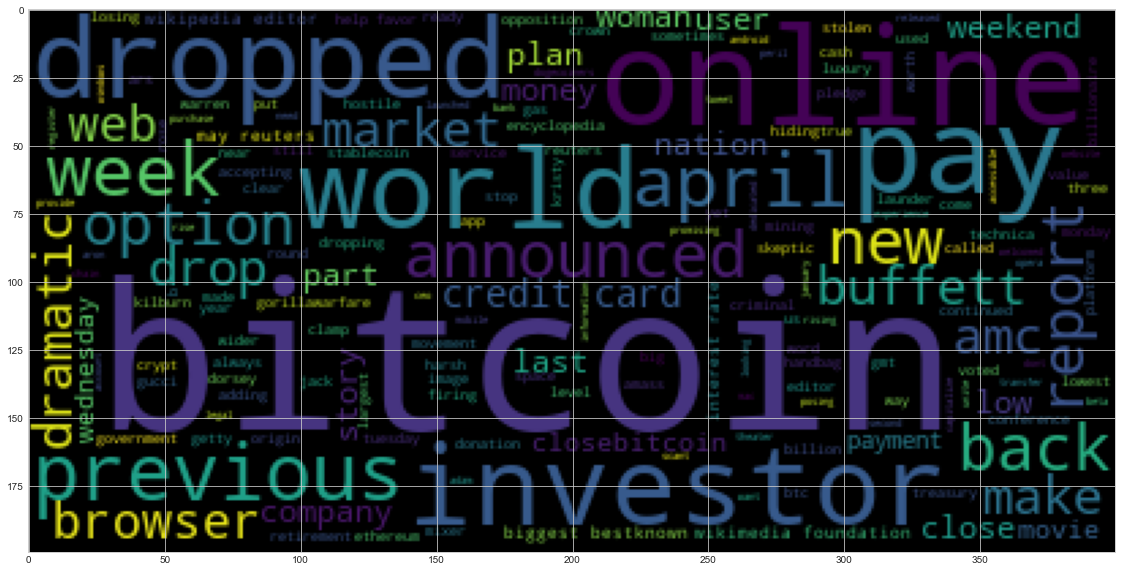

In [419]:
# Generate the Bitcoin word cloud
btc_tokens_str = tokenize(btc_corpus)
wc = WordCloud().generate(' '.join(btc_tokens_str))
plt.imshow(wc)

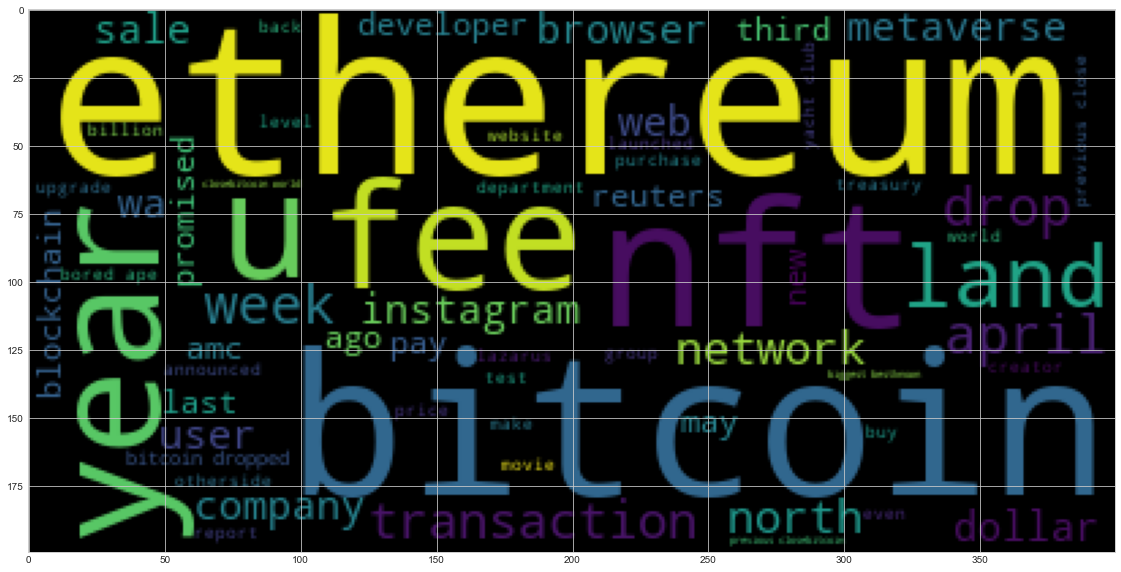

In [420]:
# Generate the Ethereum word cloud
eth_tokens_str = tokenize(eth_corpus)
wc = WordCloud().generate(' '.join(eth_tokens_str))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [398]:
import spacy
from spacy import displacy

In [399]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [400]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [401]:
# Concatenate all of the Bitcoin text together


In [402]:
# Run the NER processor on all of the text


# Add a title to the document


In [403]:
# Render the visualization


In [404]:
# List all Entities


---

### Ethereum NER

In [405]:
# Concatenate all of the Ethereum text together


In [406]:
# Run the NER processor on all of the text


# Add a title to the document


In [407]:
# Render the visualization


In [408]:
# List all Entities


---